# MODEL DEVELOPMENT

In [739]:
import warnings
warnings.filterwarnings("ignore")

# Introduction

A model can be thought as a mathematical equation (algorithm) used to predict an inc.ertain value given (output) one or more variables (input)

Usually the more relevant data you have the more accurate your model is.

Input  $\rightarrow$ MODEL $\rightarrow$ Output

# Simple Linear Regression vs Multiple Linear Regression

Simple Linear regression will refer to one independant variable to make a prediction  

$y = b_0 + b_1 x$  

- $y$ the target   
- $b_0$ the intercept  
- $b_1$ the slope  
- $x$ the predictor variable  

whereas Multiple Linear Regression refers to multiple indenpendent variables to make a prediction.  

$y = b_0 + b_1 x_1 + ... + b_n x_n$  

When we **fit** or **train** the model we will come up with these parameters: $b_0, b_1 \ldots$  
When we want to make a prediction we **predict**.  
Note: we usually store the datapoint into a pandas dataframe or a numpy array.

In [740]:
# Load the data
import pandas as pd
rep = '/Users/davidtbo/Documents/Data_Science/99_Data'
df = pd.read_csv(os.path.join(rep, 'CarPrice_Assignment.csv'))

In [741]:
pd.set_option('display.max_rows', 300)
pd.set_option('display.max_columns', 100)
pd.set_option('display.width', 10)

SIMPLE LINEAR REGRESSION (SLR)

Simple Linear Regression with the Python package Scikit-Learn

In [742]:
from sklearn.linear_model import LinearRegression

Create a LinearRegression object using the constructor:

In [743]:
slr = LinearRegression()

We define the predictor variable and the target variable

In [744]:
X = df[['highwaympg']]
Y = df['price']

The we use $lm.fit(X,Y)$ to fit the model i.e. to find the parameters $b_0$ and $b_1$

In [745]:
slr.fit(X,Y)

LinearRegression()

To get the intercept $b_0$

In [746]:
slr.intercept_

38162.85848448238

To get the coefficient $b_1$

In [747]:
slr.coef_

array([-809.27352829])

We can store the predictions using the predict() function into preds

In [748]:
slr_preds = slr.predict(X)

If the highwaympg is equal to 27 the prediction is given by:  

$price = 38126.8584 - 809.2735 * 27$

In [749]:
38162.85848448238 -809.27352829 * 27

16312.47322065238

To make a prediction, the new_data predictor must be the same object (here dataframe) as the object that has been used to fit the model.

In [750]:
new_data = pd.DataFrame({'highwaympg': [27]})

slr.predict(new_data)

array([16312.47322074])

MULTIPLE LINEAR REGRESSION (MLR)

This method is used to explain the relationship between:
- one continuous target variable (Y)
- two or more predictor variables (X)

$y = b_0 + b_1 x_1 + ... + b_n x_n$  

- $y$ the target   
- $b_0$ the intercept  
- $b_1$ the coefficient or parameter of the predictor variable $x_1$  
- ...  
- $b_n$ the coefficient or parameter of the predictor variable $x_n$  

whereas Multiple Linear Regression refers to multiple indenpendent variables to make a prediction.  

In [751]:
mlr = LinearRegression()

We fit the model using 4 predictors

In [752]:
X = df[['horsepower', 'curbweight', 'enginesize', 'highwaympg']]

In [753]:
mlr.fit(X,Y)

LinearRegression()

In [754]:
new_data = pd.DataFrame({'horsepower':[110], 'curbweight': [2550], 'enginesize': [150], 'highwaympg' : [25]})
new_data

,horsepower,curbweight,enginesize,highwaympg
0,110,2550,150,25


In [755]:
# The intercept (b0)
mlr.intercept_

-15762.28286674818

In [756]:
# The 4 coefficients (b1, b2, b3, b4)
mlr.coef_

array([52.446332  ,  4.63040004, 82.68402196, 40.71172629])

In [757]:
mlr_preds = mlr.predict(X)

In [758]:
pred = mlr.predict(new_data)
pred

array([15234.73020293])

In [759]:
mlr.predict(np.array([110.0, 2550.0, 150.0, 25.0]).reshape(-1,4))

array([15234.73020293])

In [760]:
-15762.28286674818 + 52.446332*110 + 4.63040004*2550 + 82.68402196*150 + 40.71172629*25

15234.730206501816

In [761]:
# Matricial writing
mlr.intercept_ + mlr.coef_.dot(new_data.values.T)

array([15234.73020293])

MODEL EVALUATION USING VISUALIZATION

Regression plot gives a good estimate of
- the relationship between two variables
- the strength of the correlation
- the direction of the relationship (positive, negative)

Regression plot shows us a combination of:
- the scatter plot where each point reprensent a different y
- the fitted linear regression line ($\hat{y}$)

In [762]:
import seaborn as sns
import matplotlib.pyplot as plt

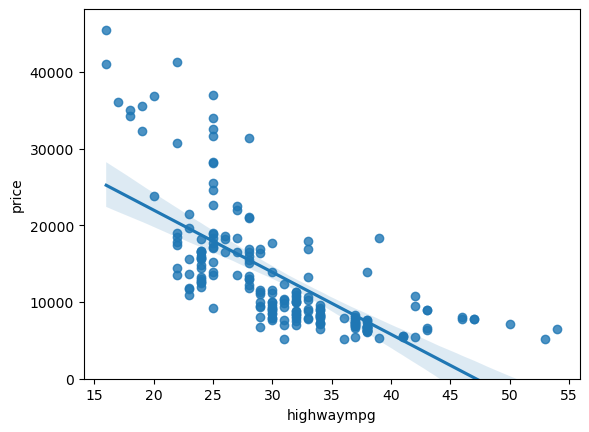

In [763]:
sns.regplot(x="highwaympg", y='price', data=df)
plt.ylim(0)
plt.show()

Residual plot  

They represent the error between the prediction and the actual value:  

- $y_{obs} - \hat{y}$

Look at the spread of the residuals:  

- if they are randomly spred out around x-axis then a linear model is appropriate


<Axes: xlabel='highwaympg', ylabel='price'>

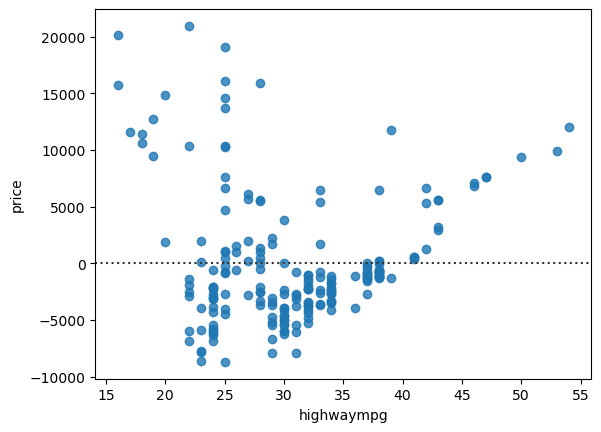

In [764]:
sns.residplot(x="highwaympg", y='price', data=df)

In this case, the residuals have a **<u>curvature</u>**.  

A linear model is not appropriate. Non linear model maybe more appropriate.

## Distribution plots

A distribution plots counts the number of target values per x values & the number of predicted values per x values.  
And then compare their distributions.
These plots are very useful for visualizing models with more than one indenpendant variables (features).  

Let's take a simplify example:  

- There are zero time (y=1)
- There are six times (y=2)
- There are zero time (y=3)


That was for the target values. Now let's make the same counting for the predicted values:  

- There are two times (y_pred=1)  
- There are two times (y_pred=1)
- There are two times (y_pred=1) 

The target distribution is (0,6,0) whereas the predicted distribution is (2,2,2)

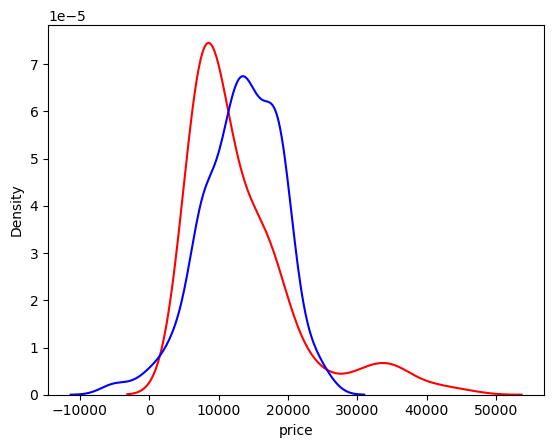

In [765]:
import seaborn as sns
ax1 = sns.kdeplot(df['price'], color='r', label='Actual values')
sns.kdeplot(slr_preds, color='b', label='Fitted values', ax=ax1)
plt.show()

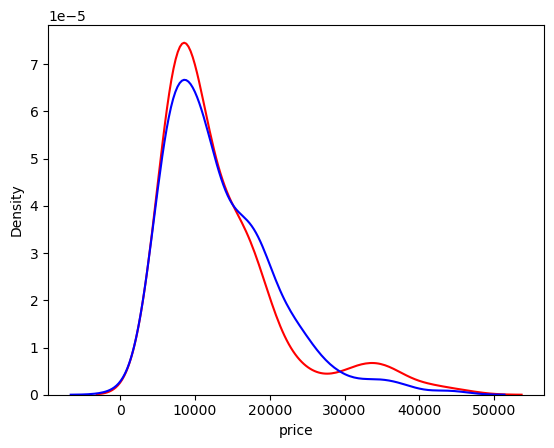

In [766]:
import seaborn as sns
ax1 = sns.kdeplot(df['price'], color='r', label='Actual values')
sns.kdeplot(mlr_preds, color='b', label='Fitted values', ax=ax1)
plt.show()

With the multiple linear regression the predicted values are much closer to the target value compare to the simple linear regression.

# POLYNOMIAL REGRESSION

What do we do when linear model is not the best fit for our data ?  
Let's looking to another type of model: polynomial regression.  

The idee is to transform our data to polynomial then use the linear regression to fit the parameters.  

Polynomial regressions:

- A special case of the general linear regression model,
- Useful for describing curvlinear relationships.

Curvelinear relationships:  

By squaring or setting higher-order terms of the predictor variables in the model transforming the data.  

- Quadratic order (2nd order):  

$y = b_0 + b_1 x_1 + b_2 {x_1}^2$

- Cubic order (3rd order):  

$y = b_0 + b_1 x_1 + b_2 {x_1}^2 + b_3 {x_1}^3$

- Higher order:  

$y = b_0 + b_1 x_1 + b_2 {x_1}^2 + \ldots + b_n {x_1}^n$

- Better fit if you kick the right degree
- In all cases, the relationship between the variable and the parameters remain linear

Calculate a polynomial of 3rd order

In [767]:
X = df['highwaympg'].values
Y = df['price'].values

We fit a 3rd order polynomial regression model

In [768]:
f = np.polyfit(X,Y,3)

In [769]:
# f contains the three coefficients (b3, b2, b1) and the intercept (b0)
f

array([-1.49603403e+00,  1.97860523e+02, -8.71437435e+03,  1.35089693e+05])

Create a polynomial object called p

In [770]:
p = np.poly1d(f)

In [771]:
p

poly1d([-1.49603403e+00,  1.97860523e+02, -8.71437435e+03,  1.35089693e+05])

In [772]:
# Évaluation du polynôme à une valeur spécifique
x_value = 27
predicted_price = p(x_value)
predicted_price

14595.46918802266

Polynomial Regression with more than one dimension

- We can also have muli dimensional polynomial linear regression  

$y = b_0 + b_1 x_1 + b_2 x_2 + b_3 x_1 x_2 + b_4 {x_1}^2 + b_5 {x_2}^2 + \ldots$

In [773]:
X = df[['highwaympg', 'citympg', 'horsepower']]
Y = df['price']

Preprocessing of the data using the scikit-learn packages

In [774]:
from sklearn.preprocessing import PolynomialFeatures

The constructor takes the degree of the polynomial as a parameter

In [775]:
pr = PolynomialFeatures(degree=2)

Then we transform the feature into polynomial features with the fit_transform() method

In [776]:
X_poly = pr.fit_transform(X)

Then we fit the linear model

In [777]:
model = LinearRegression()
model.fit(X_poly, Y)

LinearRegression()

We can now make a new prediction using predict() function.  
For example, for a new observation where: highwaympg=27, citympg=22, horsepower=130

In [778]:
new_data = np.array([[27, 22, 130]])
new_data_poly = pr.transform(new_data)
predicted_price = model.predict(new_data_poly)
predicted_price

array([15790.40505151])

# PRE-PROCESSING

As the dimension of data gets larger, we may want to normalize multiple features in scikit-learn instead we can pre-processing module to simplify many tasks.  

For example we can normmalize the each feature simultaneously.

In [779]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

sc.fit(df[['horsepower', 'highwaympg']])

X_scale = sc.transform(df[['horsepower', 'highwaympg']])

In [780]:
X_scale[:5,:]

array([[ 0.17448278, -0.54605874],
       [ 0.17448278, -0.54605874],
       [ 1.26453643, -0.69162706],
       [-0.05366798, -0.10935377],
       [ 0.27588312, -1.27390036]])

In [781]:
# All in one
X_scale_bis = sc.fit_transform(df[['horsepower', 'highwaympg']])
X_scale_bis[:5,:]

array([[ 0.17448278, -0.54605874],
       [ 0.17448278, -0.54605874],
       [ 1.26453643, -0.69162706],
       [-0.05366798, -0.10935377],
       [ 0.27588312, -1.27390036]])

Pipelines  

We can simplify the codes by using a pipeline library.  

- There are many steps to getting a prediction  

Example:  

Normalization $\rightarrow$ Polynomial Transform $\rightarrow$ Linear Regression   

We simplify the process using a pipeline.  
Pipelines sequentially perform a serie of transformations.  
The last step carries out the prediction.  

Transformations:
- Normalizations
- Polynomial transformation

Prediction:
- Linear Regression

First we import all the modules we need:

In [782]:
from sklearn.pipeline import Pipeline

from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LinearRegression

We create a list of tuples called list_input.  

- The first element of the tuple contains the name of the estimator model,  
- The second element of the tuple contains the model constructor.  

In [783]:
list_input = [('scale', StandardScaler()),
              ('polynomial', PolynomialFeatures(degree=2)),
              ('model', LinearRegression()),]

Pipeline constructor  

- We create a pipeline object.

In [784]:
pipe = Pipeline(list_input)

- We can train the pipeline object

In [785]:
pipe.fit(df[['horsepower', 'curbweight', 'enginesize', 'highwaympg']], Y)

Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures()),
                ('model', LinearRegression())])

We can also produce a prediction as well

In [786]:
y_hat = pipe.predict(df[['horsepower', 'curbweight', 'enginesize', 'highwaympg']])

X $\rightarrow$ Normalization $\rightarrow$ Polynomial Transform $\rightarrow$ Linear Regression $\rightarrow \hat{y}$ 

The method:
- 1. Normalize the data
- 2. Performs a polynomial transformation
- 3. Output the prediction

# MEASURE FOR In-Sample EVALUATION

Now that we've seen how to evaluate the model by **visualization** we want to **numerically** evaluate the model.  

Let's stock to some measures we use for In-Sample evaluation.  

- A way to numerically determine how good the model fit on datasets.  
- Two important measures to determine the fit of a model:

    - **Mean Squared Error (MSE)**
    
    - **R-squared $R^2$**

## Mean Squared Error (MSE)

$MSE = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2$

In Python we can measure the MSE as follows

In [787]:
from sklearn.metrics import mean_squared_error

In [788]:
mean_squared_error(df['price'], y_hat)

9571628.740486924

In [789]:
1/len(df['price'])*(df['price']-y_hat).dot(df['price']-y_hat)

9571628.740486922

Is it a "good value" ?  

In Machine Learning, MSE is one of the regression cost function that we will try to optimize (minimize) with an iterative process.  

The final regression parameters $\beta$ will the ones corresponding to the ones providing the minimum of this convex function.  

The "goodness" of the MSE is relative to the data you are modeling.

## R-Squared ($R^2$)

- The coefficient of Determination R-Squared $R^2$
- Is a measure to determine how close the data is to the fitted regression line
- $R^2$ is the percentage variation of the target variable Y that is explained by the linear model
- Think about it as comparing a regression model to a simple model i.e. the mean of the data points our model should perform much better than just the mean.

The coefficient of determination $R^2$

$R^2 = 1 - \frac{\sum_{i=1}^{n} (y_i - \hat{y}_i)^2}{\sum_{i=1}^{n} (y_i - \bar{y})^2}$

$R^2 = 1 - \frac{MSE-of-the-regression-line}{MSE-of-the-average-line}$

Source: https://fr.wikipedia.org/wiki/Coefficient_de_détermination#/media/Fichier:Coefficient_of_Determination.svg

Illustration of the determination coefficient for the linear regression.

In [790]:
from IPython.display import HTML

image_path = '/Users/davidtbo/Documents/Data_Science/17_Supervised_ML/png/R_squared.png'
display(HTML(f'<img src="{image_path}" width="800">'))

- The right line represents the regression line,
- The blue squares represent the MSE of the regression line,
- The red line represents the average value of the data points,
- the red squares represent the MSE of the average line $\hat{y}$,
- we see the area of hte blue square is much smaller than the area of the red squares.

In this case of a simple regression line, the ratio of the areas of MSE is close to zero, $R^2$ is closed to 1.

- Generally, the values of the $R^2$ is between 0 and 1

- We can compute the $R^2$ as follows

In [791]:
X = df[['highwaympg']]
Y = df['price']

In [792]:
slr = LinearRegression()

slr.fit(X,Y)

slr.score(X,Y)

0.48664449266610066

48.66% of the variation of the price is explained by the model.  

If $R^2$ is negative it is maybe due to <u>overfitting</u>

## Prediction and Decision Making

How can we determine if our model is correct ?  

Decision Making: Determine a Good Model Fit.  

To determine final best fit, we look at a combination of:  

- Do the predicted values make sense ?
- Visualization,
- Numerical measures for evaluation,
- Comparing models

- Do the predicted values make sense ?

In [793]:
slr.predict(np.array(30.0).reshape(-1, 1))

array([13884.65263588])

This seems to make sense the value is not negative neither extremly high nor extremly low.

In [794]:
slr.coef_

array([-809.27352829])

This value corresponds to the multiple of the highway-mpg feature. Also called the slope of the regression line.  
It it increases of +1 unit the price will decrease approximatively of 809 $. This value also seems reasonable. 

Below we ploted out the model:

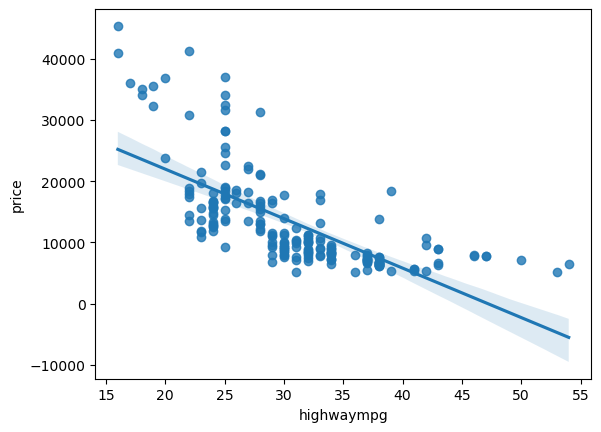

In [795]:
sns.regplot(x="highwaympg", y='price', data=df)
plt.show()

Sometimes your model will produce values that don't make sense.  
Here we get negative values for the price.  
This could be because the values are note **ranged** in a relastic way,  
<u>the linear asumption is incorrect</u> or <u>we don't have data for cars in that range.</u>  
In this case, it is unlikely that the car will have few miles in that range. So the model seems valid.  

To generate a sequence of values in a specific range,

- First we import numpy

In [796]:
import numpy as np

- We use numpy function arrange to generate a sequence from 1 to 100

In [797]:
new_input = np.arange(1, 101, 1).reshape(-1,1)

We can predict new values

In [798]:
y_hat = slr.predict(new_input)

The output is a numpy array. Many of the values are negative.

- Visualization

Simply visualization your data with a regression:

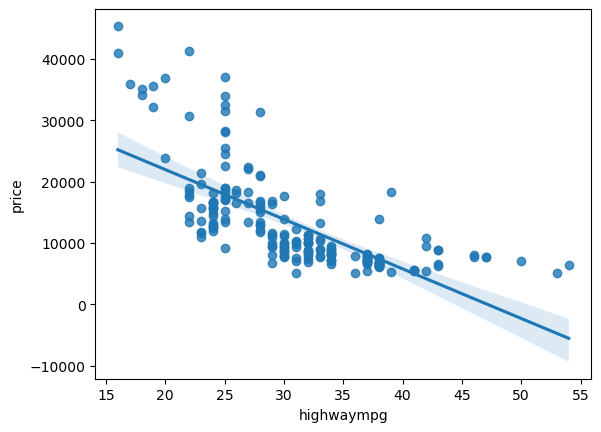

In [799]:
sns.regplot(x="highwaympg", y='price', data=df)
plt.show()

For this example, the effect of the independant variable is evident in this case.  
The data trends down as the independant variables increase.  
The plot also shows some non linear behavior (exp(-x))

- Residual Plot

<Axes: xlabel='highwaympg', ylabel='price'>

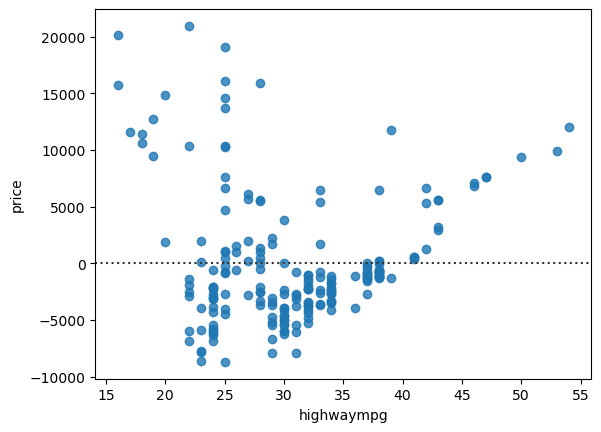

In [800]:
import seaborn as sns
sns.residplot(x="highwaympg", y='price', data=df)

Residuals have a curvature suggesting non linear regression.

A distribution plot is a good method for multiple linear regression.

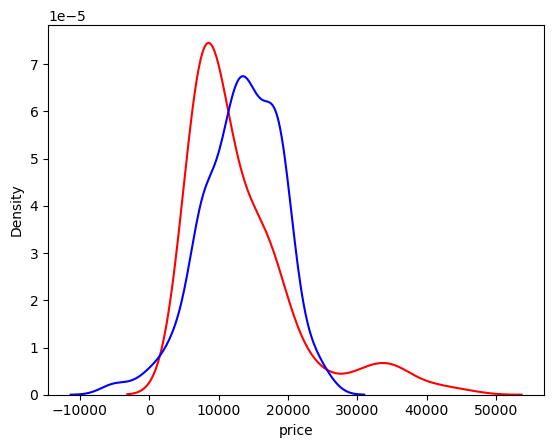

In [801]:
import seaborn as sns
ax1 = sns.kdeplot(df['price'], color='r', label='Actual values')
sns.kdeplot(slr_preds, color='b', label='Fitted values', ax=ax1)
plt.show()

We see the predicted values for a range of 30000 to 50000 are inaccurate.  
This suggest a non linear model maybe more suitable or we need more data in this range.

- Numerical measures for Evaluation

The MSE is perhaps the most intuitive numerical measure for determining if a model is Good or not.  
As the MSE increases, the target gets further from the predicted points.

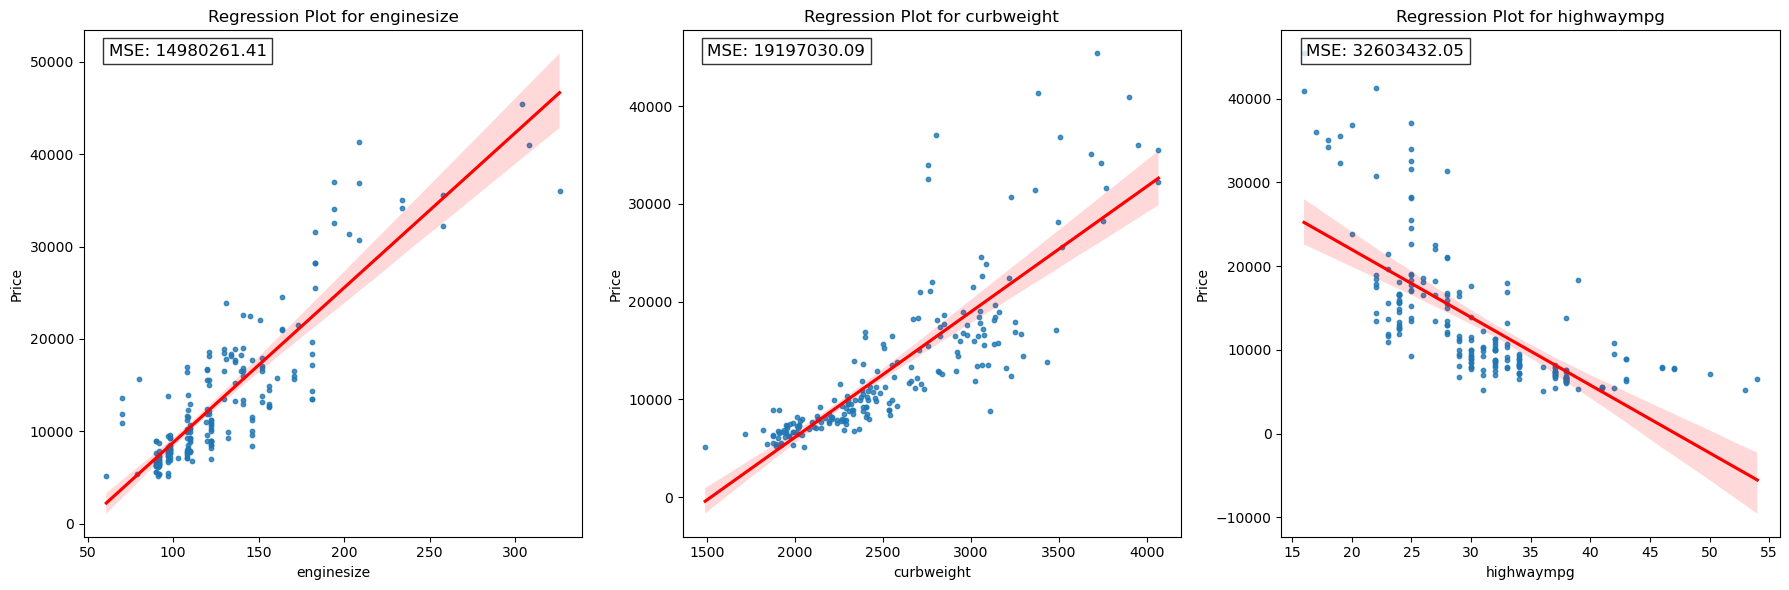

In [802]:
from sklearn.metrics import mean_squared_error

# Features to plot
features = ['enginesize', 'curbweight', 'highwaympg']

# Create subplots
fig, axes = plt.subplots(nrows=1, ncols=len(features), figsize=(18, 6))

for i, feature in enumerate(features):
    ax = axes[i]

    # Create the regression plot
    sns.regplot(x=df[feature], y=df['price'], scatter_kws={'s':10}, line_kws={"color":"r"}, ax=ax)

    # Calculate the MSE
    X = df[[feature]]
    y = df['price']
    model = LinearRegression()
    model.fit(X, y)
    y_pred = model.predict(X)
    mse = mean_squared_error(y, y_pred)

    # Annotate the plot with the MSE value
    ax.annotate(f'MSE: {mse:.2f}', xy=(0.05, 0.95), xycoords='axes fraction',
                fontsize=12, bbox=dict(facecolor='white', alpha=0.8))

    # Set titles and labels
    ax.set_title(f'Regression Plot for {feature}')
    ax.set_xlabel(feature)
    ax.set_ylabel('Price')

# Adjust layout
plt.tight_layout()
plt.show()

As we discussed, $R^2$ is another popular method to evaluate your model.

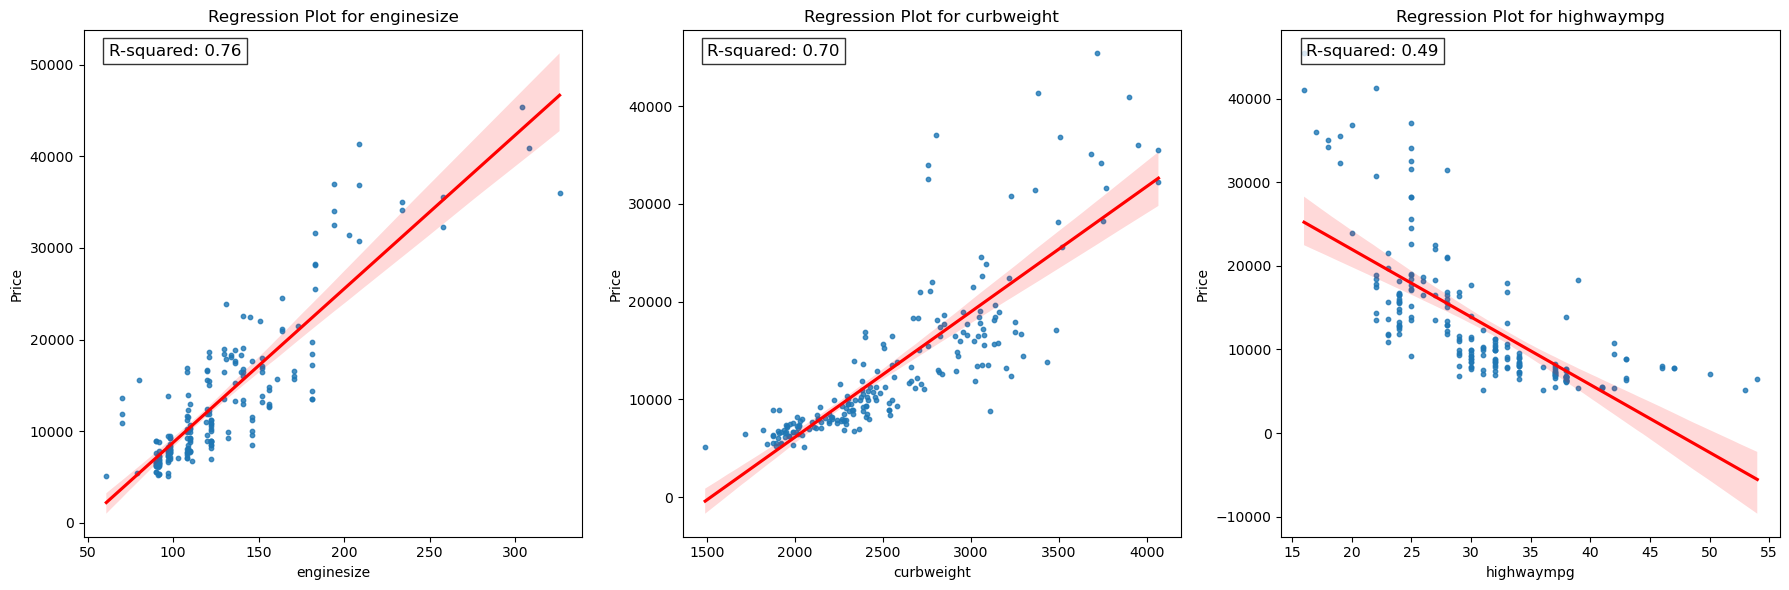

In [803]:
from sklearn.metrics import mean_squared_error

# Features to plot
features = ['enginesize', 'curbweight', 'highwaympg']

# Create subplots
fig, axes = plt.subplots(nrows=1, ncols=len(features), figsize=(18, 6))

for i, feature in enumerate(features):
    ax = axes[i]

    # Create the regression plot
    sns.regplot(x=df[feature], y=df['price'], scatter_kws={'s':10}, line_kws={"color":"r"}, ax=ax)

    # Calculate the MSE
    X = df[[feature]]
    y = df['price']
    model = LinearRegression()
    model.fit(X, y)
    y_pred = model.predict(X)
    r_squared = model.score(X, y)

    # Annotate the plot with the R-squared value
    ax.annotate(f'R-squared: {r_squared:.2f}', xy=(0.05, 0.95), xycoords='axes fraction',
                fontsize=12, bbox=dict(facecolor='white', alpha=0.8))

    # Set titles and labels
    ax.set_title(f'Regression Plot for {feature}')
    ax.set_xlabel(feature)
    ax.set_ylabel('Price')

# Adjust layout
plt.tight_layout()
plt.show()

In the third graph, the linear function is hard to see but on closer inspection we see the data is increasing with the indenpendant variable.  

An acceptable value for $R^2$ depends of what field you are studying.  
Some author suggested the value should be > .10 (Falk and Miller - 1992)

## Comparing MLR and SLR

1. Is a lower MSE always implying a better fit ? Not necessarely.  
2. MSE for an MLR model will be smaller than the MSE for an SLR model, since errors of the data will decrease when more variables are included in the model.  
3. Polynomial regression will also have a smaller MSE than regular regression.  
4. A similar inverse relationship holds for $R^2$  
5. In the next session we will look at better ways to evaluate the model.

# Model evaluation

- In-Sample evaluation (see before) tells us how well our model fit the data used to train it.  
- Problem ?
    - It does not tell us how well the trained model can be used to predict new data.
- Solution: Split the data
    - In-Sample data or training data
    - Out-of-sample evaluation or test set (used to approximate how the model performs in the real world)  

Separating data into training / testing sets is an important part of model evaluation.  

- Split data into:
    - Training set (70%),
    - Testing set (30%)

- Build and train the model with a training set,
- Use testing set to assess the performance of a predictive model,
- When we have completed testing our model we should use all the data to train the model to get the best performance.  

## Function train_test_split

- Split the data into random train and test subsets

In [804]:
from sklearn.model_selection import train_test_split

In [805]:
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.3, random_state=0)

- x_data: features or independant variables
- y_data: dataset target in our case df['price']
- X_train, y_train: parts of available data as training set
- X_test, y_test: parts of available data as testing set,
- test_size: percentage of the data for testing (here 30%),
- random_state: number generator used for random sampling.

## Generalization Performance

- Generalization error is a measure of how well our data does at predicting previously unseen data,
- The error we obtain using our testing data is an approximation of this error,

- Generalization error represents what we see in the real world.

Lots of training data  

Using a lots of data for training gives us an accurate mean of determining how well our model will perform in the real world.  
But the precision of the performance will be low !  

Let's clarify it with an example.  

Let's say we take a random sample of the data using 90% of the data for training and 10% for testing.  
- The first time we experiment we get a good estimate of the training,
- If we experiment again training the model with another 90/10, we also get a good result but different from the first time we experiment.
- If we repeat again and again (90/10) the results are different but close to each other.  

Repeating the process we get good approximation of the Generalization error but the precision is poor i.e. all the results are different from one another.  

If we use fewer data points to train the model and more to test the model, the accuracy of the Generalization performance will be less But the model will have good precision (all the results will be close to each other).


To overcome this problem we use **cross-validation**

## Cross-validation

- Most common out-of-sample evaluation metrics,
- more effective use of data (each observation is used for both training and testing)

The dataset is split into k equal groups. Each group is referd to as a fold (e.g. 4 folds).  
Some of the folds can be used as training set and the remaining part is used as the test set (e.g. 3 folds for training, 1 fold for testing).  

It is repeated till each partition has been used for training and teting.  

At the end we use the average results as the estimate of out-of-sample error.  
The evaluation metric depends on the model (for example $R^2$).

## Function cross_val_score()

The simplest way to apply cross-validation is to call cross_val_score() function which performs multiplies out of sample evaluations.

In [806]:
from sklearn.model_selection import cross_val_score

In [807]:
scores = cross_val_score(slr, X, Y, cv=3)

- cv = 3 means a split into 3 equal partitions  

The cross_val_score() function returns an array of scores. One for each partition that was chosen as the testing set.  
We can average the result together to estimate out of sample $R^2$ using the mean() function.  
When we average we reduce the variance.

In [808]:
np.mean(scores)

0.30186636109622517

The cross_val_score() gives a more robust evaluation of the model performance.  
It allows a better Generalization of the error than the evaluation with a unique test sample.  
This is due to the utilisation of several test datasets and the averaging of the results which reduces the variance.

What if we want a little bit more information ?  
What if we want to know the actual predicted value supply by the model before the $R^2$ values are calculated ?

##  Function cross_val_predict()

- It returns the prediction that was obtained for each element when it was in the test set.  
- Has a similar interface to cross_va_score() but the output is a prediction.

In [809]:
from sklearn.model_selection import cross_val_predict

In [810]:
y_hat = cross_val_predict(slr, X, Y, cv=3)

The process:

- 1. Division of the X dataset into 3 equal partitions:  e.g. Fold 1 samples 1 to 33, Fold 2 samples 34 to 66 observations and Fold 3 samples the observations 67 to 100,
- 2. Train & Predict: 
    - iteration 1, train on the Folds 1 and 2 and predictions on the Fold 3
    - iteration 2, train on the Folds 1 and 3 and predictions on the Fold 2
    - iteration 1, train on the Folds 2 and 3 and predictions on the Fold 1
- 3. Combinaison of the predictions:
    - concatenation of the predictions of the samples 1 to 33 (from the iteration 3) and the predictions of the samples 34 to 66 (from the iteration 2) and the predictions of the samples 67 to 100 (from the iteration 1)

If you want to predict on a new data, the cross validation will not provide the model to perform this prediction.  
It "only" provides a robust evaluation of the model thanks to cross_val_score() and generates the predictions on the train dataset with cross_val_predict().  
So if you need to predict on new data, you must train a **<u>final model</u>** on the global X dataset and predict with this final model.

The cross-validation is generally used when the dataset has a poor number of targets.

## Overfitting, Underfitting and Model Selection

We have already talked about polynomial regression in this section:
- how to select the best polynomial order ?
- problem that arrise when select the wrong polynomial order.

In the Polynomial Regression, the model selection consists in determining the order of the polynomial to provide the best estimate of the y funciton.  

If the data visualisation is a curve and you fit a linear model of first order (linear regression), the line is not complex enough to fit the data.  
As a result thera are many errors. This is called <u>underfitting</u>.  

In [811]:
X_sort = X.sort_values(by='highwaympg')

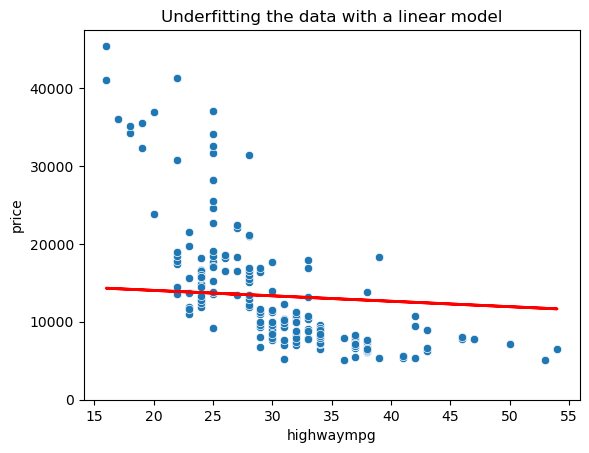

In [812]:
slr.fit(X_sort,Y)
y_preds = slr.predict(X)

sns.scatterplot(x="highwaympg", y='price', data=df)
plt.plot(X, y_preds, color='red', linewidth=2, label='Droite de régression')
plt.title('Underfitting the data with a linear model')
plt.ylim(0)
plt.show()

If we increase the order of the polynomial to the second order.

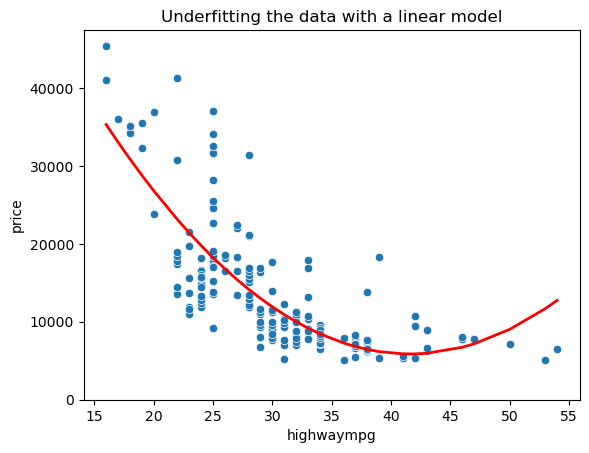

In [813]:
# We create the pipeline object
list_input = [('polynomial', PolynomialFeatures(degree=2)),
              ('model', LinearRegression()),]
pipe = Pipeline(list_input)
# we train the model
pipe.fit(df[['highwaympg']], Y)
# We generate the predictions
y_preds = pipe.predict(X_sort)
# we visualize the results
sns.scatterplot(x="highwaympg", y='price', data=df)
plt.plot(X_sort, y_preds, color='red', linewidth=2, label='Droite de régression')
plt.title('Underfitting the data with a linear model')
plt.ylim(0)
plt.show()

If we increase the order of the polynomial to the third order.

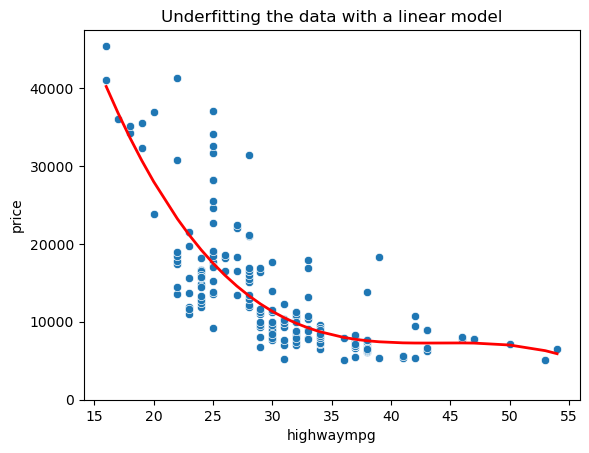

In [814]:
# We create the pipeline object
list_input = [('polynomial', PolynomialFeatures(degree=3)),
              ('model', LinearRegression()),]
pipe = Pipeline(list_input)
# we train the model
pipe.fit(df[['highwaympg']], Y)
# We generate the predictions
y_preds = pipe.predict(X_sort)
# we visualize the results
sns.scatterplot(x="highwaympg", y='price', data=df)
plt.plot(X_sort, y_preds, color='red', linewidth=2, label='Droite de régression')
plt.title('Underfitting the data with a linear model')
plt.ylim(0)
plt.show()

The model does well at fitting the data and estimating the function even at the inflexion points.

If we increase the order of the polynomial to the tenth order.

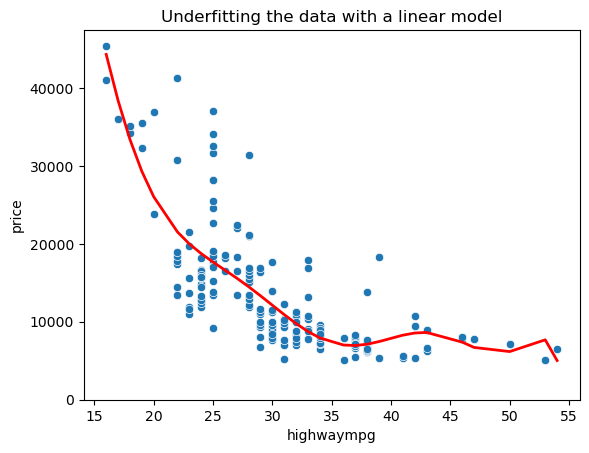

In [815]:
# We create the pipeline object
list_input = [('polynomial', PolynomialFeatures(degree=10)),
              ('model', LinearRegression()),]
pipe = Pipeline(list_input)
# we train the model
pipe.fit(df[['highwaympg']], Y)
# We generate the predictions
y_preds = pipe.predict(X_sort)
# we visualize the results
sns.scatterplot(x="highwaympg", y='price', data=df)
plt.plot(X_sort, y_preds, color='red', linewidth=2, label='Droite de régression')
plt.title('Underfitting the data with a linear model')
plt.ylim(0)
plt.show()

The model does very well at tracking training points but perform poorly at estimating the function.  
This is especially apparent where there are little training data.  
The estimated function isolate not tracking the function.  
This is called **<u>Overfitting</u>** when the model is too flexible and fits the noise rather than the function.

## Model Selection

In [816]:
from IPython.display import HTML

image_path = '/Users/davidtbo/Documents/Data_Science/17_Supervised_ML/png/overfitting.png'
display(HTML(f'<img src="{image_path}" width="600">'))

If we select the best order of the polynomial corresponding to the "Best fit" we still have an error.  
There is a noise term (y + noise). This term is one reason for the error this is because the noise is random and we can't predict it.  
This is sometimes refer to as an irreductible error.  

There are others sources of error as well.  
For example our polynomial asumption maybe wrong.  
Our sample points may come from a different function.  

Example: Data is generating from assign wave.

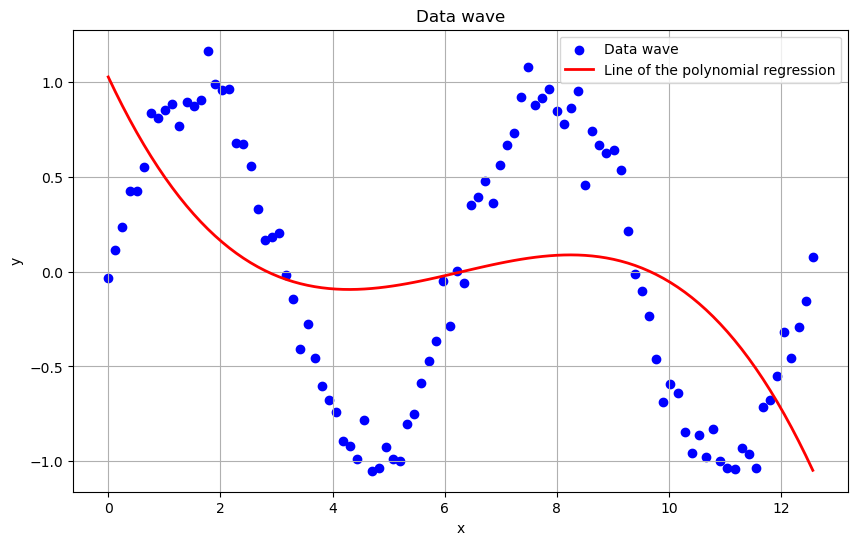

In [817]:
# Paramètres pour les données sinusoïdales
amplitude = 1.0
frequency = 1.0
phase = 0.0
noise_level = 0.1
num_points = 100

# Génération des données sinusoïdales
x = np.linspace(0, 4 * np.pi, num_points)
y = amplitude * np.sin(frequency * x + phase) + noise_level * np.random.randn(num_points)

# Création du DataFrame
data = {'x': x, 'y': y}
data = pd.DataFrame(data)


# We create the pipeline object
list_input = [('scale', StandardScaler()),
              ('polynomial', PolynomialFeatures(degree=3)),
              ('model', LinearRegression()),]
pipe = Pipeline(list_input)
# we train the model
pipe.fit(data[['x']], data['y'])
# We generate the predictions
y_preds = pipe.predict(data[['x']])


# Data visualisation
plt.figure(figsize=(10, 6))
plt.scatter(x, y, label='Data wave', color='blue')
plt.plot(x, y_preds, color='red', linewidth=2, label='Line of the polynomial regression')
plt.title('Data wave')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()

The polynomial function does not do a good job at fitting the sign wave.  
For real data, the model maybe too difficult to fit or we may not have the correct type of data to estimate the function.  

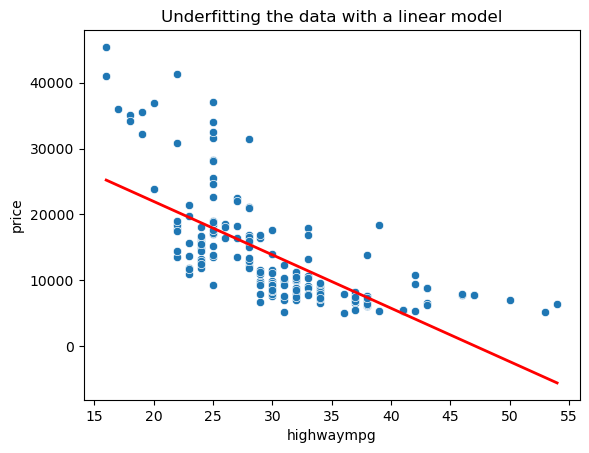

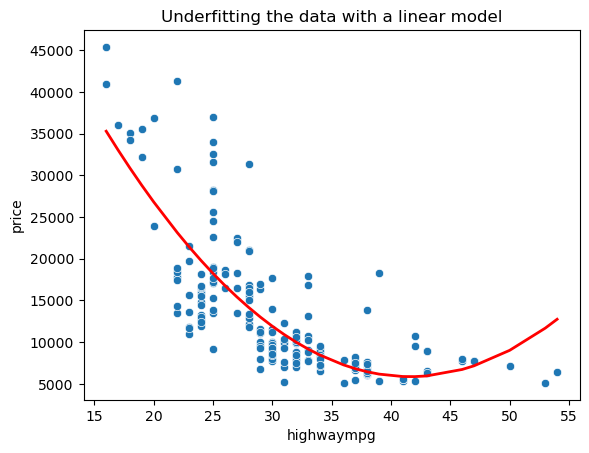

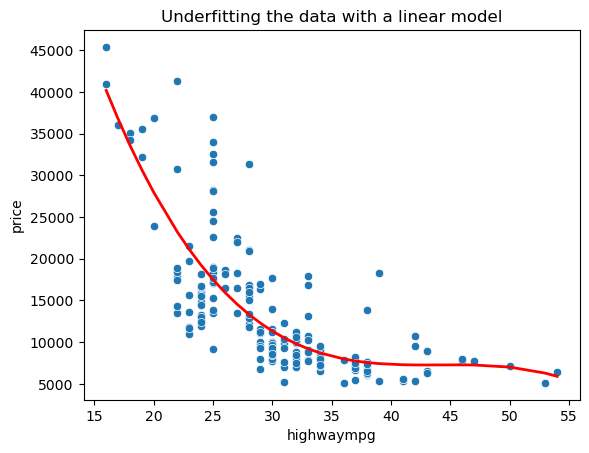

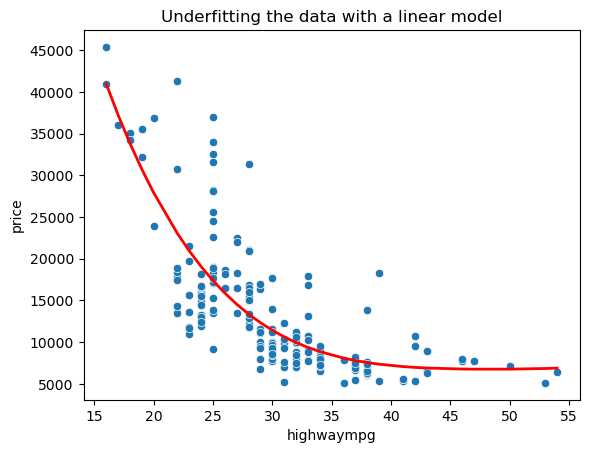

In [818]:
# Define the dataset
data = df[['highwaympg','price']].sort_values(by='highwaympg')

for n in range(1,5):
    # We create the pipeline object (order=1)
    list_input = [('polynomial', PolynomialFeatures(degree=n)),
                ('model', LinearRegression()),]
    pipe = Pipeline(list_input)
    # we train the model
    pipe.fit(data[['highwaympg']], data['price'])
    # We generate the predictions
    y_preds = pipe.predict(data[['highwaympg']])

    # we visualize the results
    sns.scatterplot(x="highwaympg", y='price', data=data)
    plt.plot(data[['highwaympg']], y_preds, color='red', linewidth=2, label='Droite de régression')
    plt.title('Underfitting the data with a linear model')
    plt.show()

The first order model does not perform wery well.  
From the second order to the fourth, the performance of the models seem to increase with the order.

Let's see with $R^2$ if our assumption is correct.  

In [819]:
X_train, X_test, y_train, y_test = train_test_split(df[['highwaympg']],df['price'], test_size=0.3, random_state=0)

In [820]:
rsqu_test = []

for n in range(1,5):
    
    # Creation of the polynomial object
    pr = PolynomialFeatures(degree=n)
    x_train_pr = pr.fit_transform(X_train)
    x_test_pr = pr.fit_transform(X_test)
    
    # We fit a linear regression using the transform data
    slr.fit(x_train_pr, y_train)

    # We calculate the R-square and store
    rsqu_test.append(slr.score(x_test_pr, y_test))


In [821]:
rsqu_test

[0.41845707690297507,
 0.5928727353605401,
 0.6690775456118422,
 0.5908412027422167]

From the $R^2$ point of view our asumption was correct, the largest $R^2$ is obtained with the third model.

# Ridge Regression

Ridge regression prevents overfitting. 

In this section we will focus on polynomial regression for visualization but overfiiting is also a big issue when you have multiple variables or features.  


In [822]:
from sklearn.linear_model import Ridge

In [823]:
from sklearn.metrics import r2_score

Create a ridge object using the constructor. We will come back later on the metaparameter $\alpha$

In [824]:
rm = Ridge(alpha=0.1)

Train the model using the fit method

In [825]:
rm.fit(X, Y)

Ridge(alpha=0.1)

Make the predictions

In [826]:
y_pred = rm.predict(X)

Compute the $R^2$ using r2_score() method

In [827]:
r2_score(y_pred, Y).round(4)

-0.0549

A negative R-squared indicates that the model fails to explain the variability of the data better than a baseline model based on the average.  

This was just an example in order to manipulate methods around the Ridge regression.


We illustrate in the following programs several concepts using a polynomial transformation of order 5 and a ridge regression:  

1. Ridge regression controls the magnitude of the polynomial coefficients by introducing the parameter $\alpha$. The more $\alpha$ increases the more the polynomial coeffficients decrease in absolute value. $\alpha$ must be selected carefully. If $\alpha$ is too large, the coeffiicents will approach zero and underfit the data.  

2. To find $\alpha$, we iterate for all $\alpha$ starting with a small value. The values of $\alpha$ are stored in a grid. For each $\alpha$ we train a corresponding model and make the predictions on the testing set. We compute the resulting $R^2$ for this particular $\alpha$ and select the $\alpha$ that maximize the $R^2$.

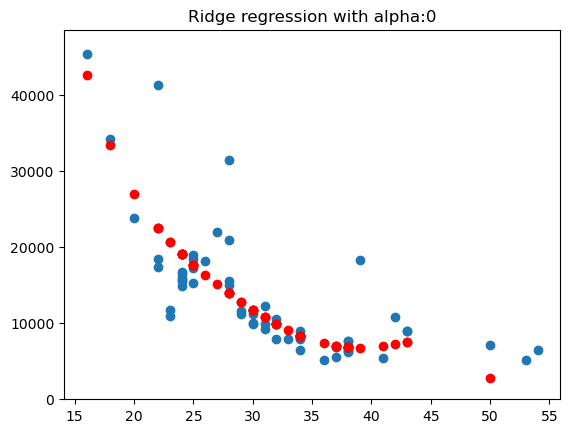

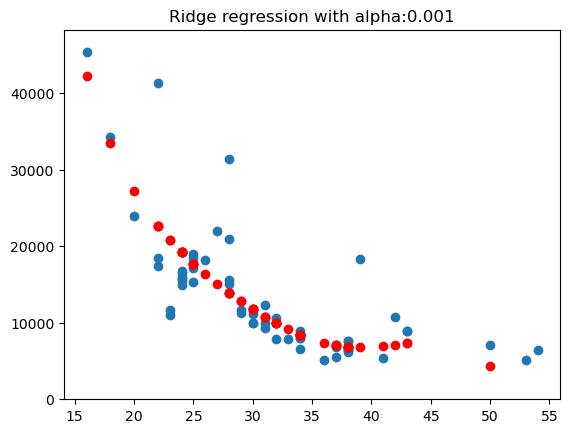

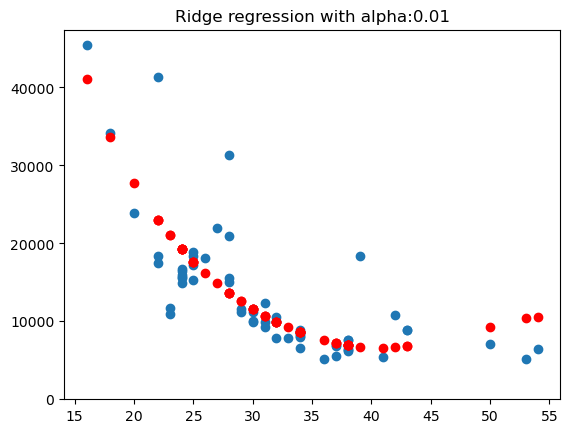

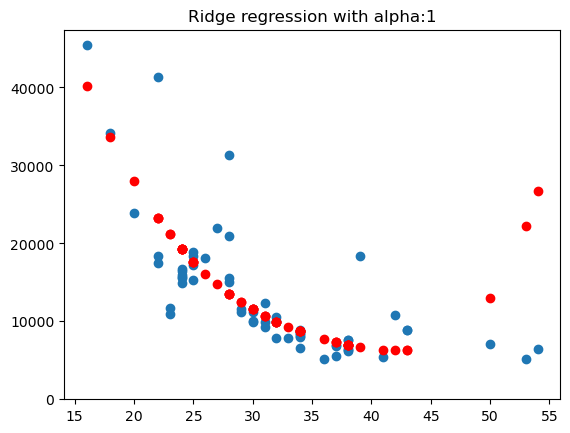

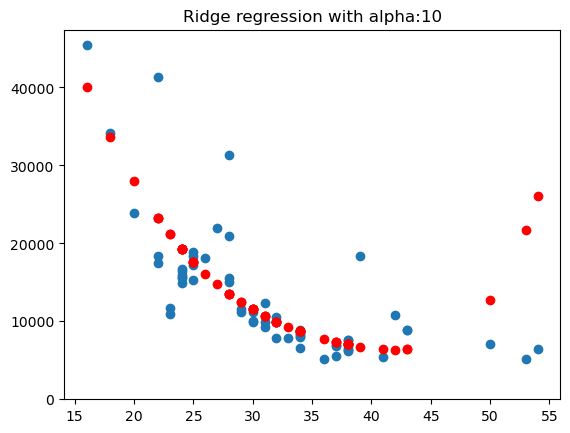

alpha that maximize R2 is : 0.01 

alpha: 0
R-squared (train): 0.6517
R-squared (test): 0.4702
Coefficients: [[0.0000 -70383.4136 4329.5700 -135.4163 2.1050 -0.0129]]
alpha: 0.001
R-squared (train): 0.6516
R-squared (test): 0.5765
Coefficients: [[0.0000 -59775.1684 3603.9856 -111.3256 1.7159 -0.0104]]
alpha: 0.01
R-squared (train): 0.6504
R-squared (test): 0.6672
Coefficients: [[0.0000 -25378.3878 1251.3156 -33.2129 0.4544 -0.0025]]
alpha: 1
R-squared (train): 0.6486
R-squared (test): 0.4917
Coefficients: [[0.0000 -426.9356 -454.1915 23.3784 -0.4590 0.0033]]
alpha: 10
R-squared (train): 0.6486
R-squared (test): 0.5024
Coefficients: [[0.0000 -71.8767 -468.4486 23.5430 -0.4570 0.0032]]


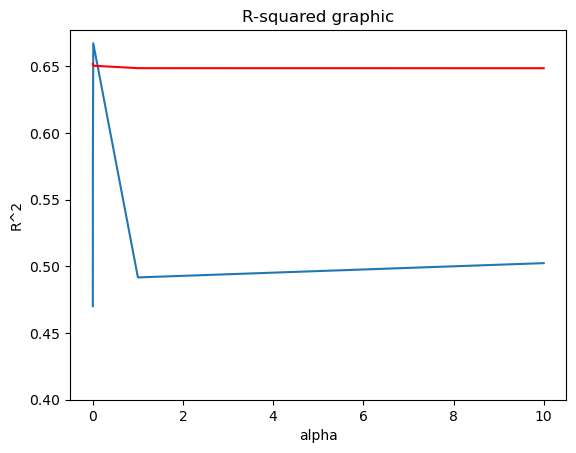

In [828]:
# Prepare the data
X = df[['highwaympg']]
Y = df[['price']]

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=0)

# The polynomial order
N=5

# Definition of the alpha grid
alpha_grid in [0, 0.001, 0.01, 1, 10]

# Init the rsquared list & the coefficients list:
rsqu_test = []
rsqu_train = []
coefficients = []

for alpha in alpha_grid:

    # The pipeline object (polynomial transformation + create a ridge object)
    list_input = [('polynomial', PolynomialFeatures(degree=N)),
                  ('model', Ridge(alpha=alpha)),]
    pipe = Pipeline(list_input)

    # Train the model
    pipe.fit(X_train, y_train)

    # Generate the predictions
    y_preds = pipe.predict(X_test)

    # We calculate the R-square and store
    rsqu_test.append(r2_score(y_test, y_preds))
    rsqu_train.append(r2_score(y_train, pipe.predict(X_train)))

    # Store the coefficients
    coefficients.append(pipe.named_steps['model'].coef_)

    plt.title('Ridge regression with alpha:' + str(alpha))
    plt.scatter(X_test, y_test)
    plt.scatter(X_test, y_preds, color='red')
    plt.ylim(0)
    plt.show()

# We select the index corresponding to the maxium R2 in two times

# 1. Find the maximum value
max_value = max(rsqu_test)

# Find the index of the maximal value
max_index = rsqu_test.index(max_value)

print('alpha that maximize R2 is :', alpha_grid[max_index],'\n')

# Display the outputs
for i, alpha in enumerate(alpha_grid):
    print(f"alpha: {alpha}")
    print(f"R-squared (train): {rsqu_train[i]:.4f}")
    print(f"R-squared (test): {rsqu_test[i]:.4f}")
    print(f"Coefficients: {np.array2string(coefficients[i], formatter={'float_kind':lambda x: '%.4f' % x})}")

plt.title('R-squared graphic')
plt.plot(alpha_grid, rsqu_test)
plt.plot(alpha_grid, rsqu_train, color='red')
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.ylim(0.4)
plt.show()

As the value of $\alpha$ increases the $R^2$ increases.
- In this case test we take the maximum value of $\alpha$ because running the experiment for higher values of $\alpha$ have little impact.
- Conversely, in the train, as $\alpha$ increases, the $R^2$ decreases. This is because the term $\alpha$ prevents overfitting.  

This may improve the model for the unseen data but the model has worst performance on the test data.

## GRID SEARCH

Grid search allows us to scan though multiple free parameters with few lines of codes.  
Parameters like the $\alpha$ term are not part of the fitting or training process.   
The values are called hyperparameters.  

- In the last section, the term alpha in Ridge regression is called a hyperparameter,  
- Scikit-learn has a means of automatically iterating over these hyperparameters using cross-validation called Grid search. 

The process of the grid search:

1. Split the dataset into train, validation and test
2. Train the model for different hyperparameters
3. With the validation dataset we select the hyperparameters that minimze MSE or maximize $R^2$
4. Finally test the model performance on the test dataset  

See scikit-learn webpage, sklearn.linear_model.Ridge


sklearn.linear_model.Ridge  

It should be notice that the attribute of an object is also called parameter.  
We will not make distinction even knows some of the options are not hyperparameters.  

The value of Grid Search is a Python list which contains Python dictionary.

In [829]:
parameters = [{'alpha': [1, 10, 100, 1000]}]

The key of the dictionary is the neame of the hyperparameter.  
The values of the dict is the different values of the free parameters.

In [830]:
from sklearn.linear_model import Ridge

In [831]:
from sklearn.model_selection import GridSearchCV

In [832]:
parameters1 = [{'alpha': [0.001, 0.1, 1, 10, 100, 1000, 10000, 100000, 1000000000]}]

In [833]:
RR = Ridge()

We create a GridSearchCV object

In [834]:
Grid1 = GridSearchCV(RR, parameters1, cv=4)

We fit the model

In [835]:
Grid1.fit(df[['horsepower','curbweight','enginesize','highwaympg']], df['price'])

GridSearchCV(cv=4, estimator=Ridge(),
             param_grid=[{'alpha': [0.001, 0.1, 1, 10, 100, 1000, 10000, 100000,
                                    1000000000]}])

In [836]:
Grid1.best_estimator_

Ridge(alpha=10000)

In [837]:
scores = Grid1.cv_results_

The average of the $R^2$ (scores) of test for each combinason of the parameters.

In [838]:
scores['mean_test_score']

array([0.68367124, 0.68367149, 0.6836738 , 0.68369673, 0.68391256,
       0.68524663, 0.6869413 , 0.6690153 , 0.01284004])

To display the parameters used:

In [839]:
scores['params']

[{'alpha': 0.001},
 {'alpha': 0.1},
 {'alpha': 1},
 {'alpha': 10},
 {'alpha': 100},
 {'alpha': 1000},
 {'alpha': 10000},
 {'alpha': 100000},
 {'alpha': 1000000000}]

We can try with two paramaters $\alpha$ and $solver$

In [840]:
parameters2 = [{'alpha': [0.001, 0.1, 1, 10, 100, 1000, 10000, 100000, 1000000000],
                'solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga']}]

In [841]:
RR = Ridge()

We create a GridSearchCV object

In [842]:
Grid2 = GridSearchCV(RR, parameters2, cv=4)

We fit the model

In [843]:
Grid2.fit(df[['horsepower','curbweight','enginesize','highwaympg']], df['price'])

GridSearchCV(cv=4, estimator=Ridge(),
             param_grid=[{'alpha': [0.001, 0.1, 1, 10, 100, 1000, 10000, 100000,
                                    1000000000],
                          'solver': ['auto', 'svd', 'cholesky', 'lsqr',
                                     'sparse_cg', 'sag', 'saga']}])

In [844]:
Grid2.best_estimator_

Ridge(alpha=10000, solver='saga')

In [845]:
scores = Grid2.cv_results_

The average of the $R^2$ (scores) of test for each combinason of the parameters.

To display the parameters and their scores:

In [848]:
for param, mean_test in zip(scores['params'], scores['mean_test_score'].round(4)):
    print(param, "R^2 on test data:", mean_test)

{'alpha': 0.001, 'solver': 'auto'} R^2 on test data: 0.6837
{'alpha': 0.001, 'solver': 'svd'} R^2 on test data: 0.6837
{'alpha': 0.001, 'solver': 'cholesky'} R^2 on test data: 0.6837
{'alpha': 0.001, 'solver': 'lsqr'} R^2 on test data: 0.6837
{'alpha': 0.001, 'solver': 'sparse_cg'} R^2 on test data: 0.6837
{'alpha': 0.001, 'solver': 'sag'} R^2 on test data: 0.6856
{'alpha': 0.001, 'solver': 'saga'} R^2 on test data: 0.6864
{'alpha': 0.1, 'solver': 'auto'} R^2 on test data: 0.6837
{'alpha': 0.1, 'solver': 'svd'} R^2 on test data: 0.6837
{'alpha': 0.1, 'solver': 'cholesky'} R^2 on test data: 0.6837
{'alpha': 0.1, 'solver': 'lsqr'} R^2 on test data: 0.6837
{'alpha': 0.1, 'solver': 'sparse_cg'} R^2 on test data: 0.6837
{'alpha': 0.1, 'solver': 'sag'} R^2 on test data: 0.6856
{'alpha': 0.1, 'solver': 'saga'} R^2 on test data: 0.6864
{'alpha': 1, 'solver': 'auto'} R^2 on test data: 0.6837
{'alpha': 1, 'solver': 'svd'} R^2 on test data: 0.6837
{'alpha': 1, 'solver': 'cholesky'} R^2 on test da

In [860]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# Charger un jeu de données de régression
df = pd.read_csv(os.path.join(rep, 'CarPrice_Assignment.csv'))
X, y = df[['horsepower','curbweight','enginesize','highwaympg']], df['price']

# Divide the dataset in train, test le jeu de données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Définir le pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Normalisation des données
    ('ridge', Ridge())             # Modèle Ridge
])

# Définir la grille de paramètres à tester
# Notez que les paramètres sont préfixés par ridge__ pour indiquer qu'ils appartiennent à l'étape ridge du pipeline.
param_grid = {
    'ridge__alpha': [0.001, 0.1, 1, 10, 100, 1000, 10000, 100000, 1000000000],
    'ridge__solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga']
}

# Create the object GridSearchCV
grid_search = GridSearchCV(estimator=pipeline, param_grid=param_grid, cv=5, scoring='r2')

# Execute the grid search
grid_search.fit(X_train, y_train)

# Store the detailed results
cv_results = grid_search.cv_results_

# Afficher les meilleurs paramètres trouvés par GridSearchCV
best_params = grid_search.best_params_
print("Meilleurs paramètres trouvés :", best_params)

# Évaluer le modèle final sur l'ensemble de test
best_model = grid_search.best_estimator_
test_score = best_model.score(X_test, y_test)
print(f"Score R^2 sur l'ensemble de test: {test_score}")

Meilleurs paramètres trouvés : {'ridge__alpha': 10, 'ridge__solver': 'saga'}
Score R^2 sur l'ensemble de test: 0.8096294944899921


En suivant cette approche, vous pouvez vous assurer que votre modèle est évalué de manière appropriée sur un ensemble de test distinct, ce qui est crucial pour estimer les performances généralisées du modèle.  

Les hyperparamètres sont évalués grâce à la CV et le modèle final est testé sur un jeu de données indépendant des étapes précédentes.

In [861]:
# END